In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

base = '/content/COVID-19_Radiography_Dataset/'

In [2]:
folders = os.listdir(base)
print(folders)

['Viral_Pneumonia', 'COVID', 'Lung_Opacity', 'Normal']


In [3]:
%%time

Data, Lables = [], []

for item in folders:
    new_path = os.path.join(base, item)
    new_path += '/images'
    for img in os.listdir(new_path):
        img_path = os.path.join(new_path, img)
        Data.append(np.array(cv2.resize(cv2.imread(img_path).astype('float32') / 255.0, (100,100))))
        Lables.append(folders.index(item))

CPU times: user 57.4 s, sys: 12.6 s, total: 1min 9s
Wall time: 58 s


In [4]:
Data = np.array(Data)
Lables = np.array(Lables)
print('Data Shape', Data.shape)
print('Lable Shape', Lables.shape)

Data Shape (21165, 100, 100, 3)
Lable Shape (21165,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(Data, Lables, test_size = .2, random_state = 1)

In [6]:
print('x_train Shape', x_train.shape)
print('x_test Shape', x_test.shape)
print('y_train Shape', y_train.shape)
print('y_test Shape', y_test.shape)

x_train Shape (16932, 100, 100, 3)
x_test Shape (4233, 100, 100, 3)
y_train Shape (16932,)
y_test Shape (4233,)


In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, input_shape = (Data[0].shape), activation = 'relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(16, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(16, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
%%time
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
530/530 [==============================] - 18s 12ms/step - loss: 0.6956 - accuracy: 0.7165 - val_loss: 0.5483 - val_accuracy: 0.7796
Epoch 2/5
530/530 [==============================] - 5s 10ms/step - loss: 0.4715 - accuracy: 0.8179 - val_loss: 0.4655 - val_accuracy: 0.8252
Epoch 3/5
530/530 [==============================] - 6s 10ms/step - loss: 0.3893 - accuracy: 0.8527 - val_loss: 0.4028 - val_accuracy: 0.8495
Epoch 4/5
530/530 [==============================] - 5s 10ms/step - loss: 0.3300 - accuracy: 0.8769 - val_loss: 0.3844 - val_accuracy: 0.8575
Epoch 5/5
530/530 [==============================] - 5s 10ms/step - loss: 0.2932 - accuracy: 0.8901 - val_loss: 0.3520 - val_accuracy: 0.8717
CPU times: user 32.1 s, sys: 4.07 s, total: 36.1 s
Wall time: 43.6 s


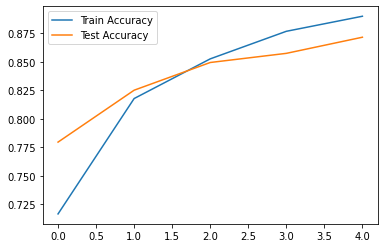

In [13]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()

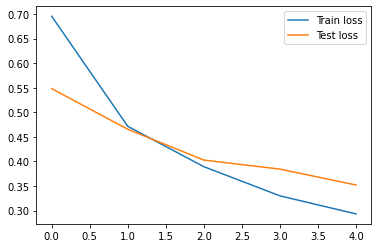

In [14]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 1s 6ms/step - loss: 0.3520 - accuracy: 0.8717


[0.3520349860191345, 0.8717221617698669]